<a href="https://colab.research.google.com/github/ansh-pachauri/GenAI-project-on-collab/blob/main/PowerTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
#!/bin/bash
! kaggle datasets download sindhuinti/concrete-data

Dataset URL: https://www.kaggle.com/datasets/sindhuinti/concrete-data
License(s): unknown
  0% 0.00/10.3k [00:00<?, ?B/s]
100% 10.3k/10.3k [00:00<00:00, 37.8MB/s]


In [8]:
import zipfile
zip = zipfile.ZipFile('concrete-data.zip')
zip.extractall()

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv("concrete.csv")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [16]:
df.describe()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
df.isnull().sum()

,0
Cement,0
Slag,0
Flyash,0
Water,0
SuperPlasticizer,0
CoarseAggregate,0
FineAggregate,0
Age,0
CSinMPa,0


In [17]:
X= df.drop(columns=['CSinMPa'])
Y= df.iloc[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [20]:
# Brfore applying Transformers
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.627553179231485

In [22]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, Y, scoring='r2'))

np.float64(0.46099404916628606)

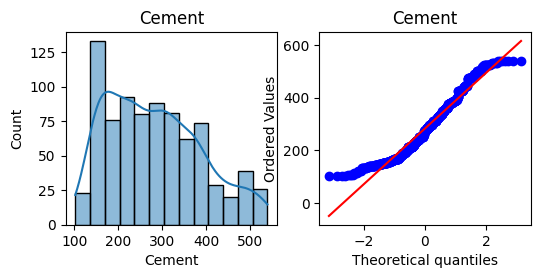

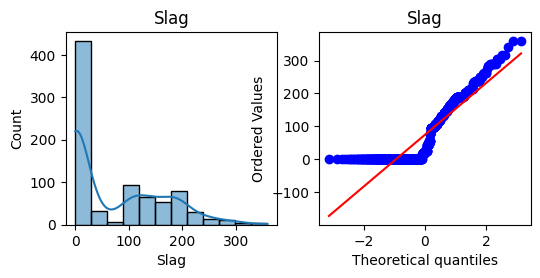

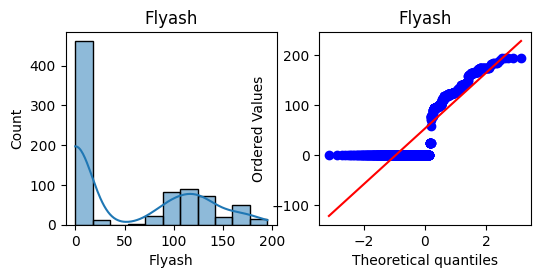

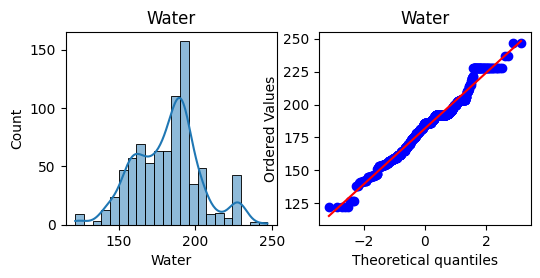

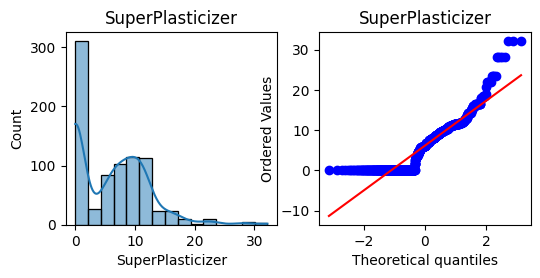

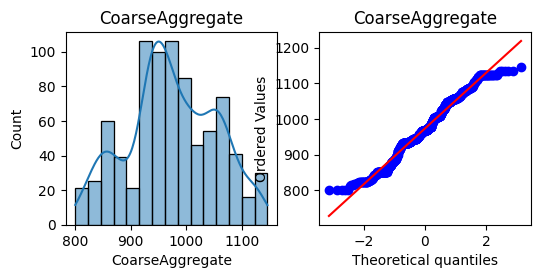

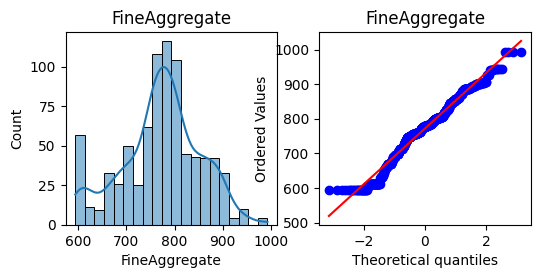

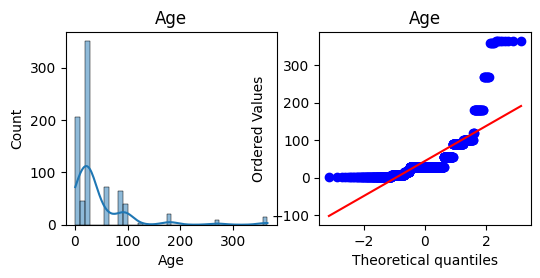

In [46]:
# Plots before transformatoin
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for col in X_train.columns:
  plt.figure(figsize=(6,2.5))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col], kde='True')
  plt.title(col)

  plt.subplot(1,2,2)
  stats.probplot(X_train[col], dist='norm', plot=plt)
  plt.title(col)
  plt.show()

In [29]:
# Applying power transforms
pt= PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.0000001)
X_test_transformed = pt.transform(X_test+ 0.000001)

In [30]:
pd.DataFrame({"col" : X_train.columns, "box_cox_labda": pt.lambdas_})

,col,box_cox_labda
0,Cement,0.177025
1,Slag,0.022767
2,Flyash,-0.034635
3,Water,0.772682
4,SuperPlasticizer,0.087141
5,CoarseAggregate,1.129813
6,FineAggregate,1.782018
7,Age,0.066631


In [31]:
lr= LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test, y_pred2)

0.8074027776710372

In [32]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X + 0.0000001)
lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed, Y, scoring='r2'))

np.float64(0.6658537935432477)

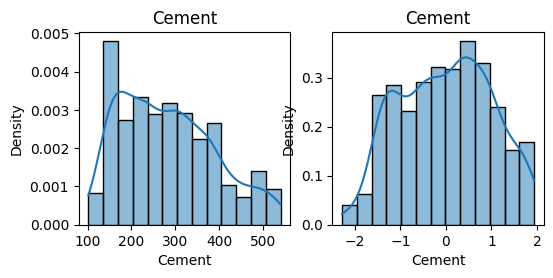

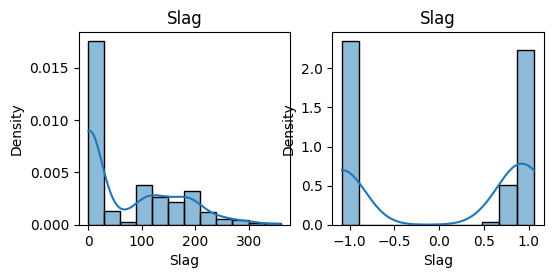

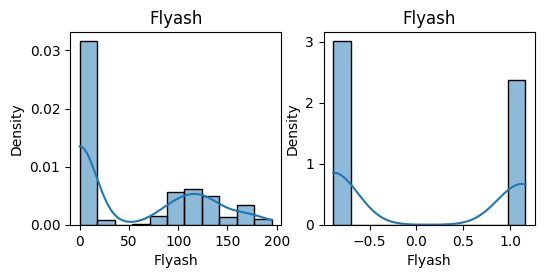

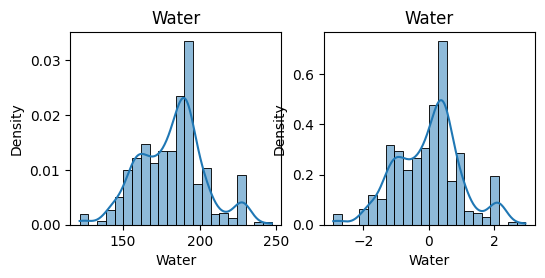

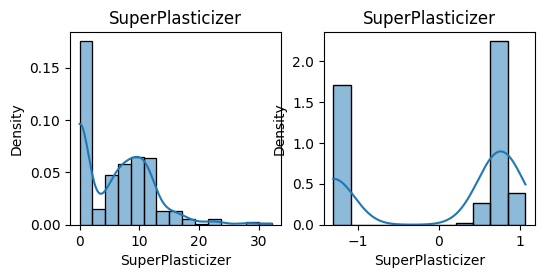

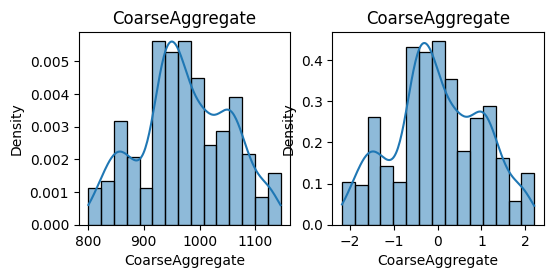

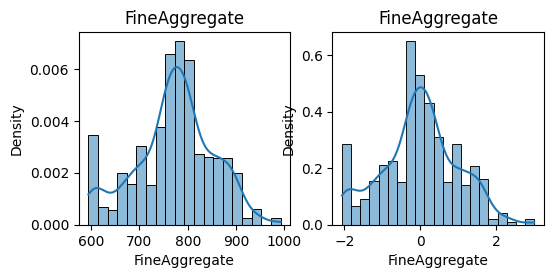

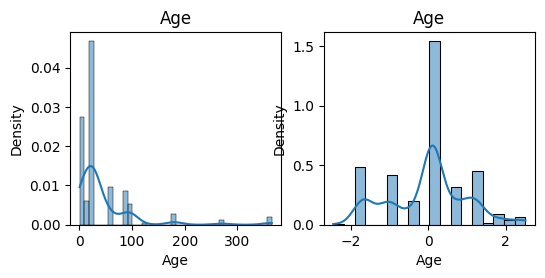

In [45]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
  plt.figure(figsize=(6,2.5))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col], stat="density", kde="True")
  plt.title(col)

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed[col], stat="density", kde="True")
  plt.title(col)
  plt.show()